HOW LONG WILL IT TAKE ALEX OVECHKIN TO BREAK THE NHL GOAL SCORING RECORD?

Alex Ovechkin is currently sitting 2nd all time in NHL Goals scored and is behind the great Wayne Gretzky's record of 894 by 72 goals.

Growing up, majority of Gretzky's record seemed untouchable and out of reach. However, throughout the years, we were able to witness Ovi's goal scoring prowess and as we approach the end of his outstanding career, the goal scoring record seems even more attainable especially after passing Gordie Howe and moving into second place on this extraordinary list.  

Today, based on historical data and machine learning, we will look at not if he reaches this record but when. 

We will start by obtaining Ovechkin's season by season Home and Away data. We have done this in the 'home_away.py' script in which we pulled this data from an API, sorted through specific values, and converted it to a csv.  

We will then find his total goals scored per season and his average games played per season.

In [1]:
import pandas as pd

df = pd.read_csv('./home_away.csv')

totalGoals = df['Home Goals'] + df['Away Goals']
totalGames = df['Home Games'] + df['Away Games']
avgGames = (df['Home Games'] + df['Away Games']).mean()

Here is a graph showing how many Goals he scored for each Season along with his Goals per Game by Season. With the exception of 2020/2021 (shortened season due to Covid 19), he has reached at least 30 goals and has sustained at least 0.4 goals per game in every single season. 

From this graph alone, we can see that he should break the goal record within the next 3 seasons, assuming his production does not tail off. We will look further into this to see if the rest of his stats can indicate if he is declining since he has always been a consistent goal scorer in his career. 

We will then adjust this predictor to incorporate his rate of decline to predict how many more games it will take for Ovi to score goal 895.

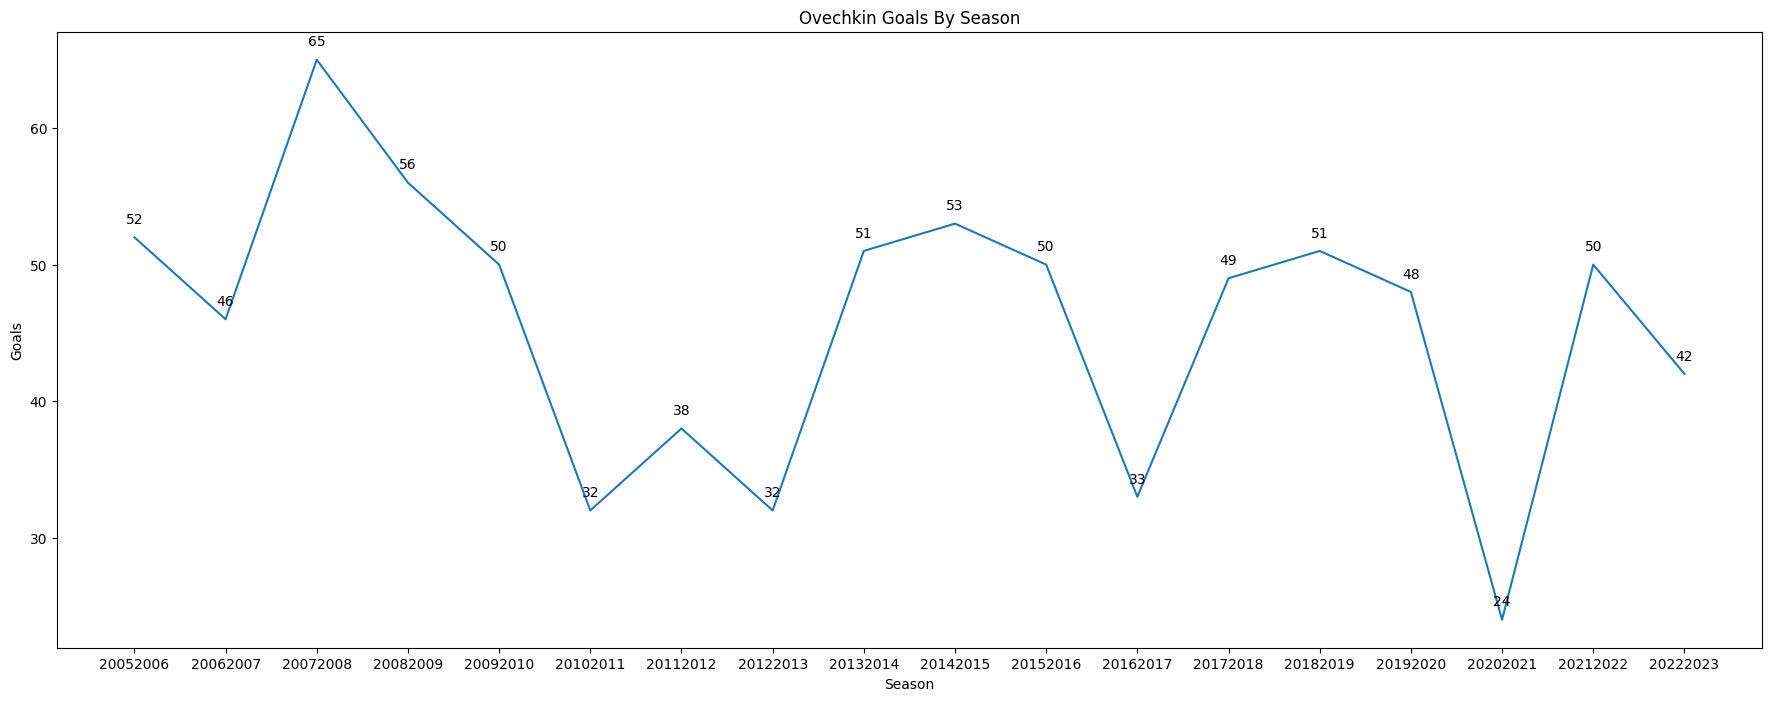

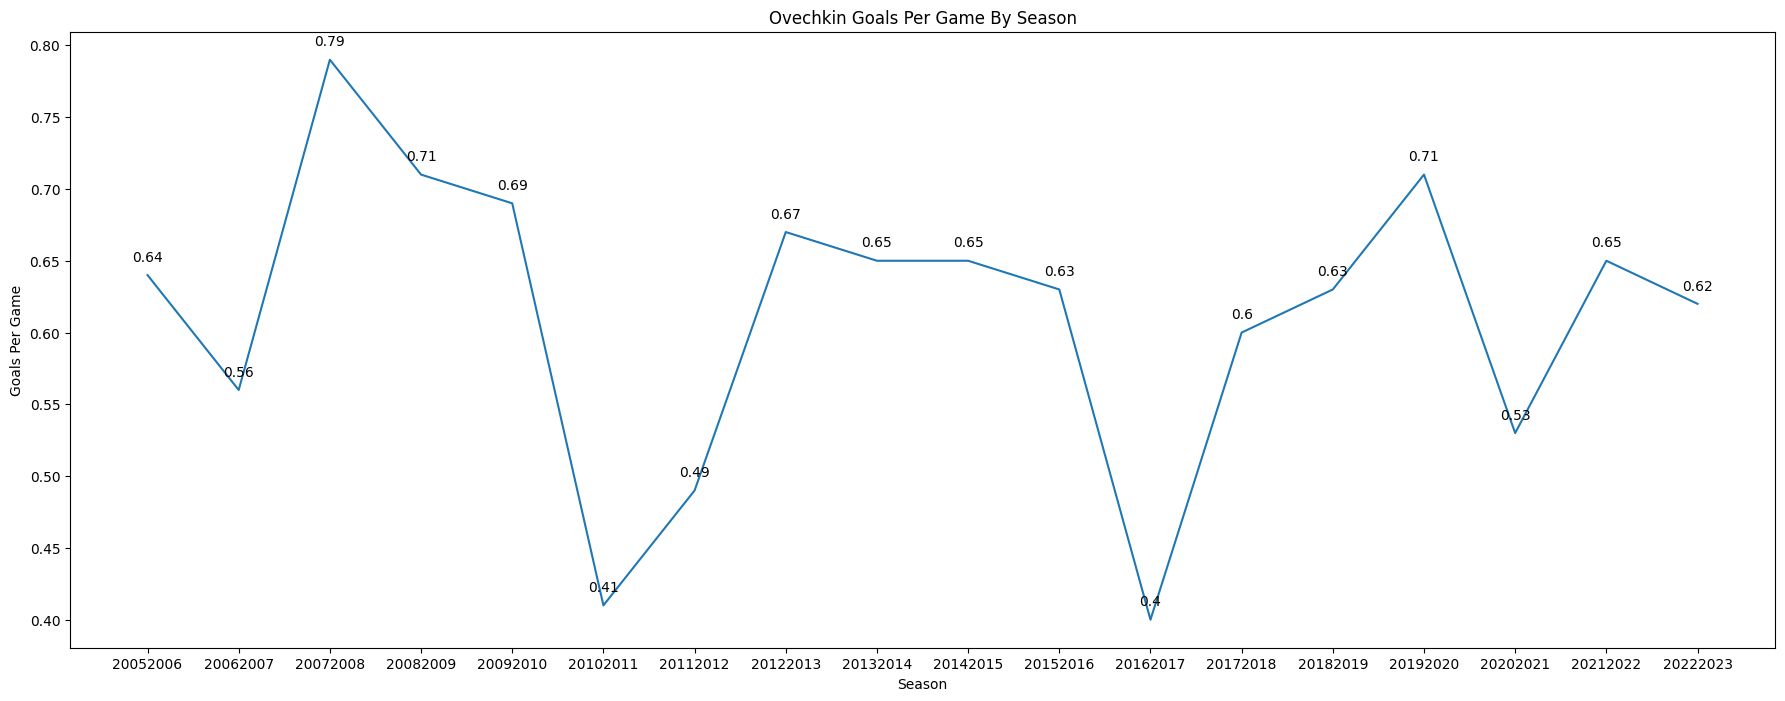

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,8))
plt.title('Ovechkin Goals By Season')

plt.plot(df['Season'] , totalGoals)
plt.xticks(df['Season'])
plt.xlabel('Season')
plt.ylabel('Goals')
plt.ticklabel_format(useOffset=False, style='plain')


for x,y in zip(df['Season'], totalGoals):
    plt.annotate(y, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')
    
    
plt.show()

goals_per_game = totalGoals/(df['Home Games']+ df['Away Games'])
gpg = round(goals_per_game, 2)

plt.figure(figsize=(22,8))
plt.title('Ovechkin Goals Per Game By Season')

plt.plot(df['Season'] , gpg)
plt.xticks(df['Season'])
plt.xlabel('Season')
plt.ylabel('Goals Per Game')
plt.ticklabel_format(useOffset=False, style='plain')


for x,y in zip(df['Season'], gpg):
    plt.annotate(y, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')
    
    
plt.show()

Let's look at the correlation between his goals and the other metrics. 

In [3]:
home_goal_corr = df.corr()['Home Goals'].abs().sort_values()

high_corr_home = home_goal_corr[(home_goal_corr > 0.4)]
print(high_corr_home)

Home GWG         0.418874
Away Goals       0.447836
Home Hits        0.456952
Home PIM         0.458266
Away PIM         0.487389
Home SHP         0.491837
Away Shifts      0.526438
Home Shifts      0.530506
Away Assists     0.542958
Home Games       0.570114
Away GWG         0.591607
Away OT Goals    0.600706
Away Games       0.623620
Away Points      0.719525
Home Points      0.739788
Home PPP         0.793653
Home PPG         0.799079
Away Shots       0.837375
Home Shots       0.870951
Home Goals       1.000000
Name: Home Goals, dtype: float64


In [4]:
away_goal_corr = df.corr()['Away Goals'].abs().sort_values()

high_corr_away = away_goal_corr[(away_goal_corr > 0.4)]
print(high_corr_away)

Home PPG              0.405990
Away Shifts           0.433543
Home Games            0.442479
Home Goals            0.447836
Home Shifts           0.449570
Home Points           0.453029
Away Shots            0.466875
Away Games            0.467863
Home Shots            0.480229
Home Blocked Shots    0.495560
Away PPG              0.543860
Home OT Goals         0.574576
Away Points           0.674632
Away Goals            1.000000
Name: Away Goals, dtype: float64


From the results above, it looks like some of the main factors that impact his scoring is:

- Hits
- PIMs
- Shifts
- Powerplays
- Shots

We will now look at the factors listed above to see if there is a trend that can explain if he is declining with age or not. 

Hits Per Game By Year

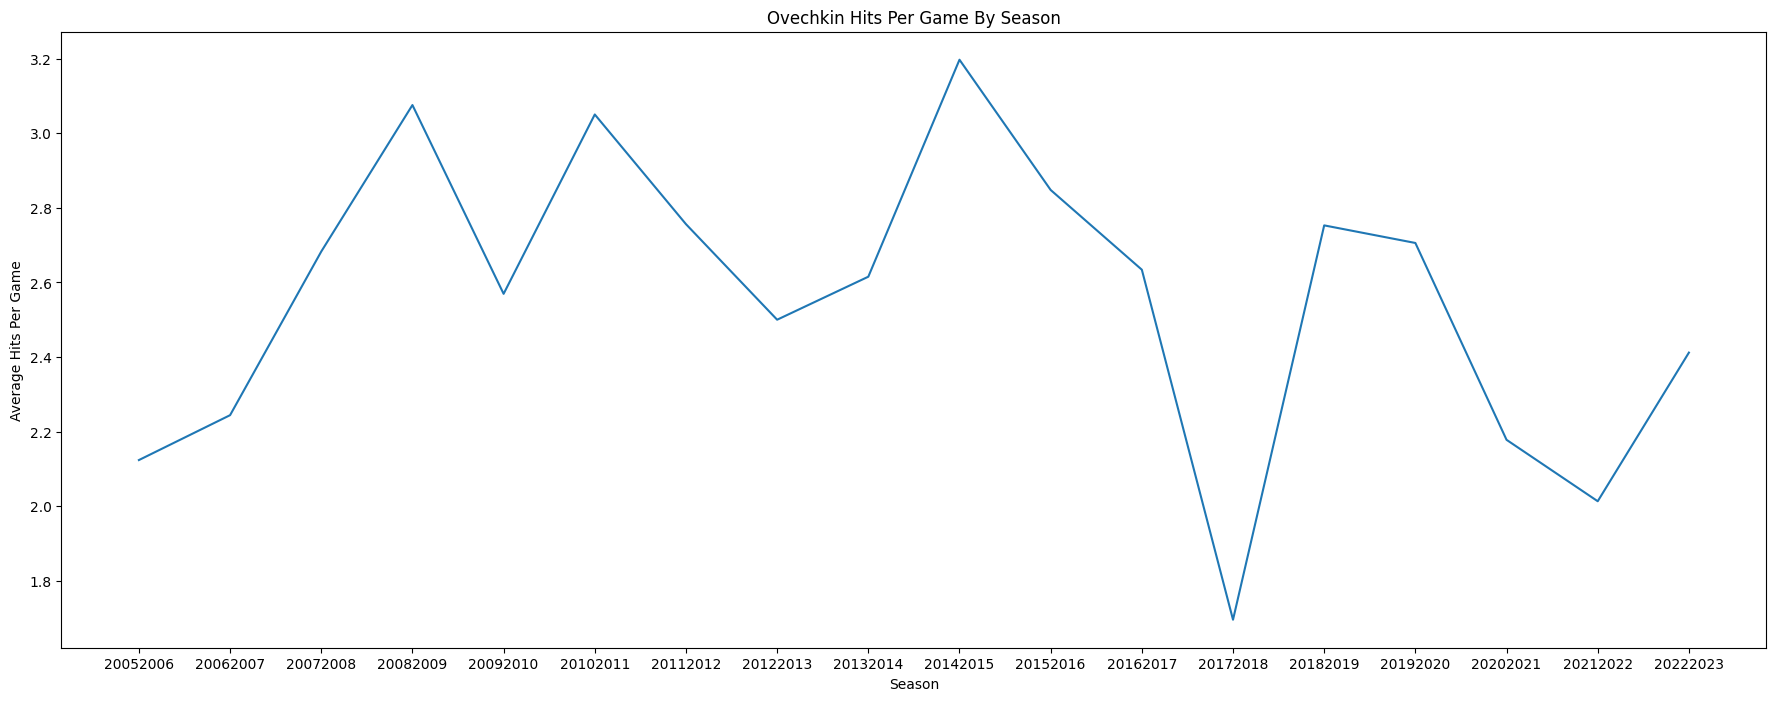

In [5]:
total_hits = (df['Home Hits'] + df['Away Hits'])
avg_hits = total_hits/(df['Home Games'] + df['Away Games'])
 
plt.figure(figsize=(22,8))
plt.title('Ovechkin Hits Per Game By Season')

plt.plot(df['Season'], avg_hits)
plt.xticks(df['Season'])
plt.xlabel('Season')
plt.ylabel('Average Hits Per Game')
plt.ticklabel_format(useOffset=False, style='plain')
    
plt.show()

Penalty Minutes Per Game By Year

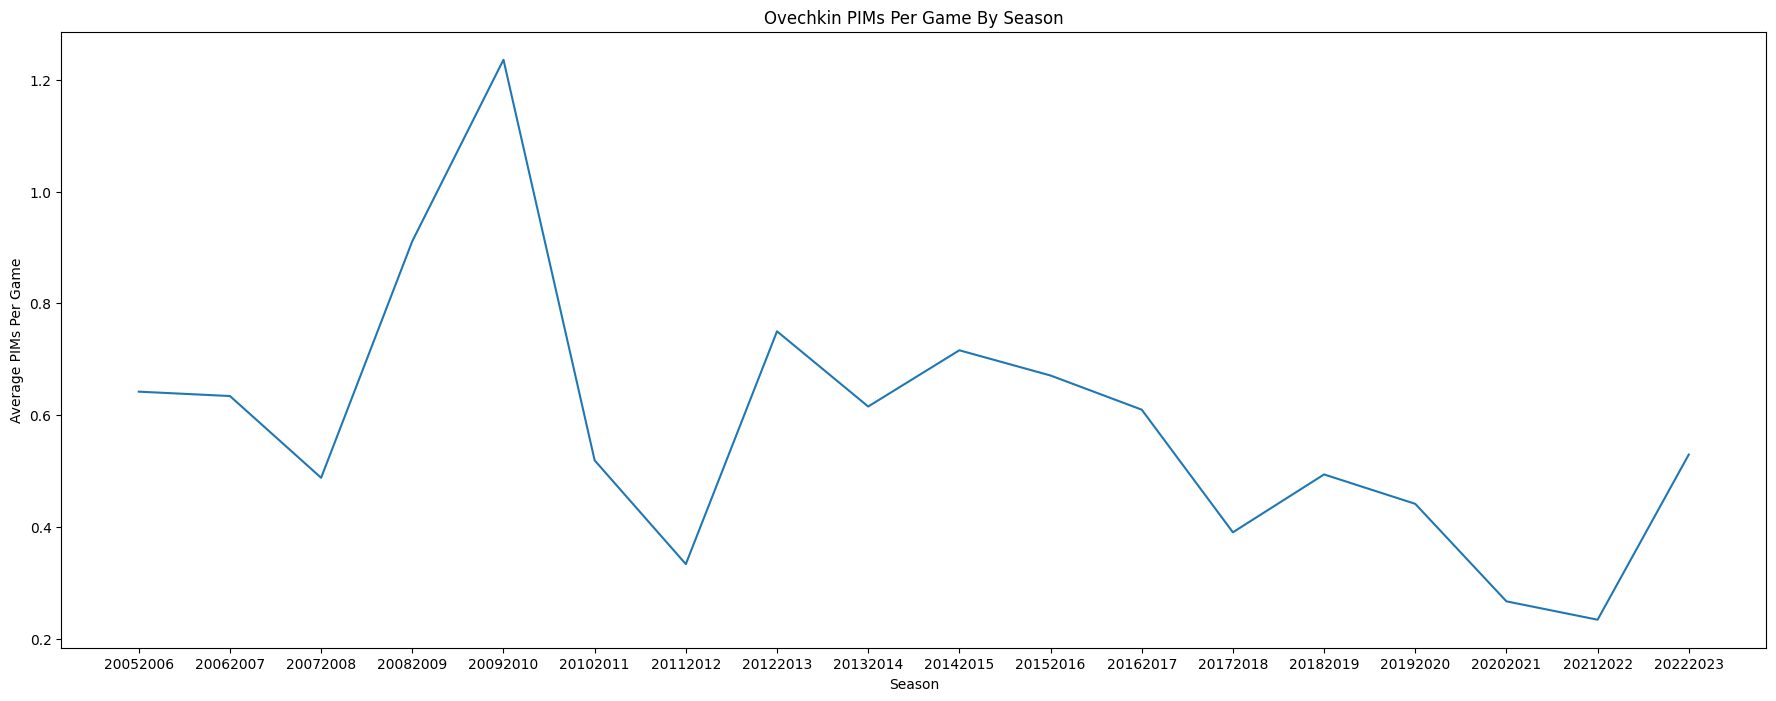

In [6]:
total_pims = (df['Home PIM'] + df['Away PIM'])
avg_pims = total_pims/(df['Home Games'] + df['Away Games'])
 
plt.figure(figsize=(22,8))
plt.title('Ovechkin PIMs Per Game By Season')

plt.plot(df['Season'], avg_pims)
plt.xticks(df['Season'])
plt.xlabel('Season')
plt.ylabel('Average PIMs Per Game')
plt.ticklabel_format(useOffset=False, style='plain')
    
plt.show()

Shifts Per Game By Year

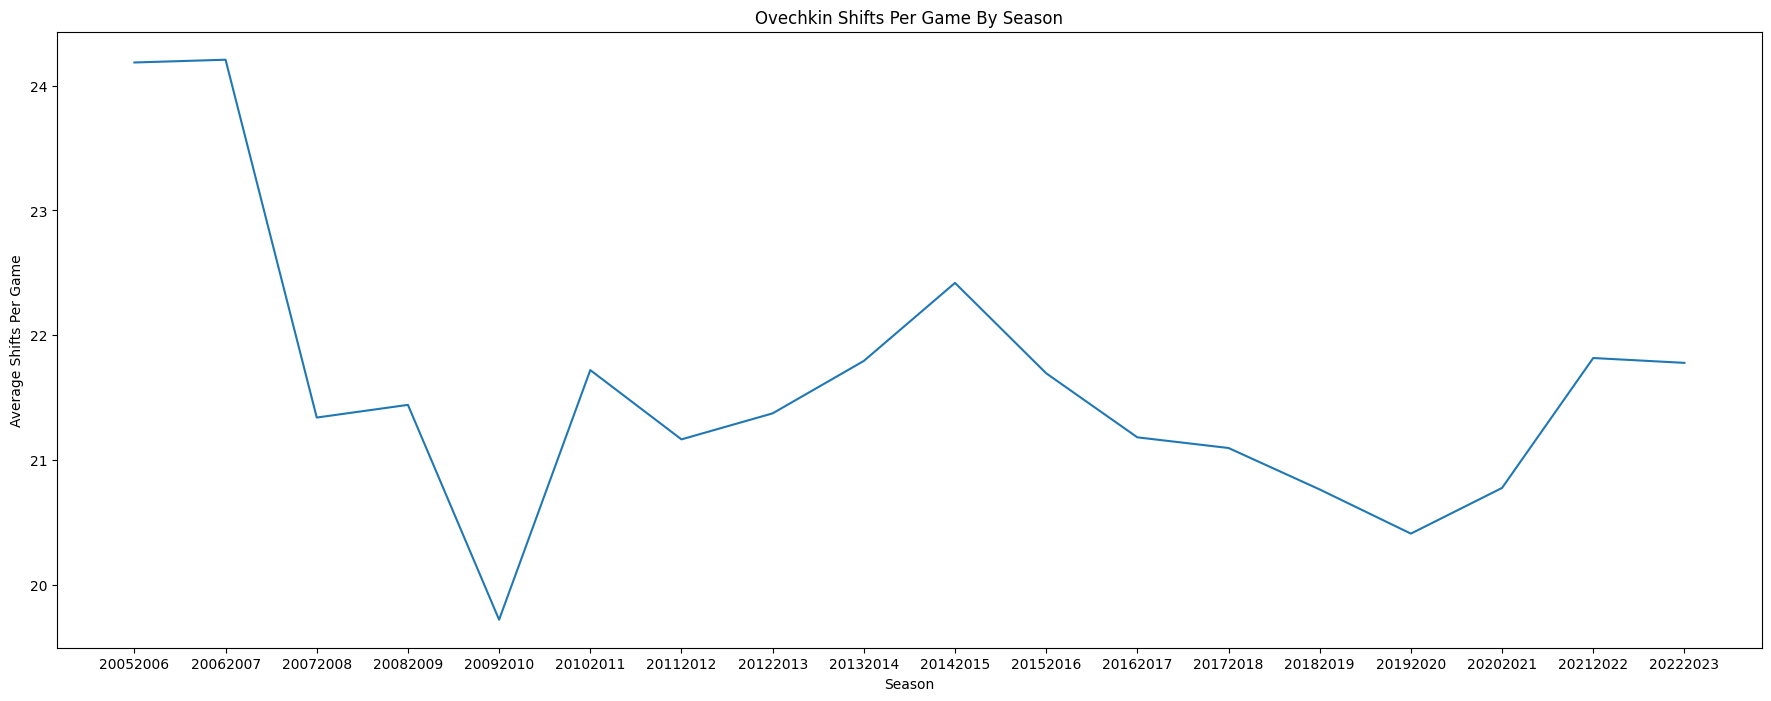

In [7]:
total_shifts = (df['Home Shifts'] + df['Away Shifts'])
avg_shifts = total_shifts/(df['Home Games'] + df['Away Games'])
 
plt.figure(figsize=(22,8))
plt.title('Ovechkin Shifts Per Game By Season')

plt.plot(df['Season'], avg_shifts)
plt.xticks(df['Season'])
plt.xlabel('Season')
plt.ylabel('Average Shifts Per Game')
plt.ticklabel_format(useOffset=False, style='plain')
    
plt.show()


Powerplay Points Per Game By Year

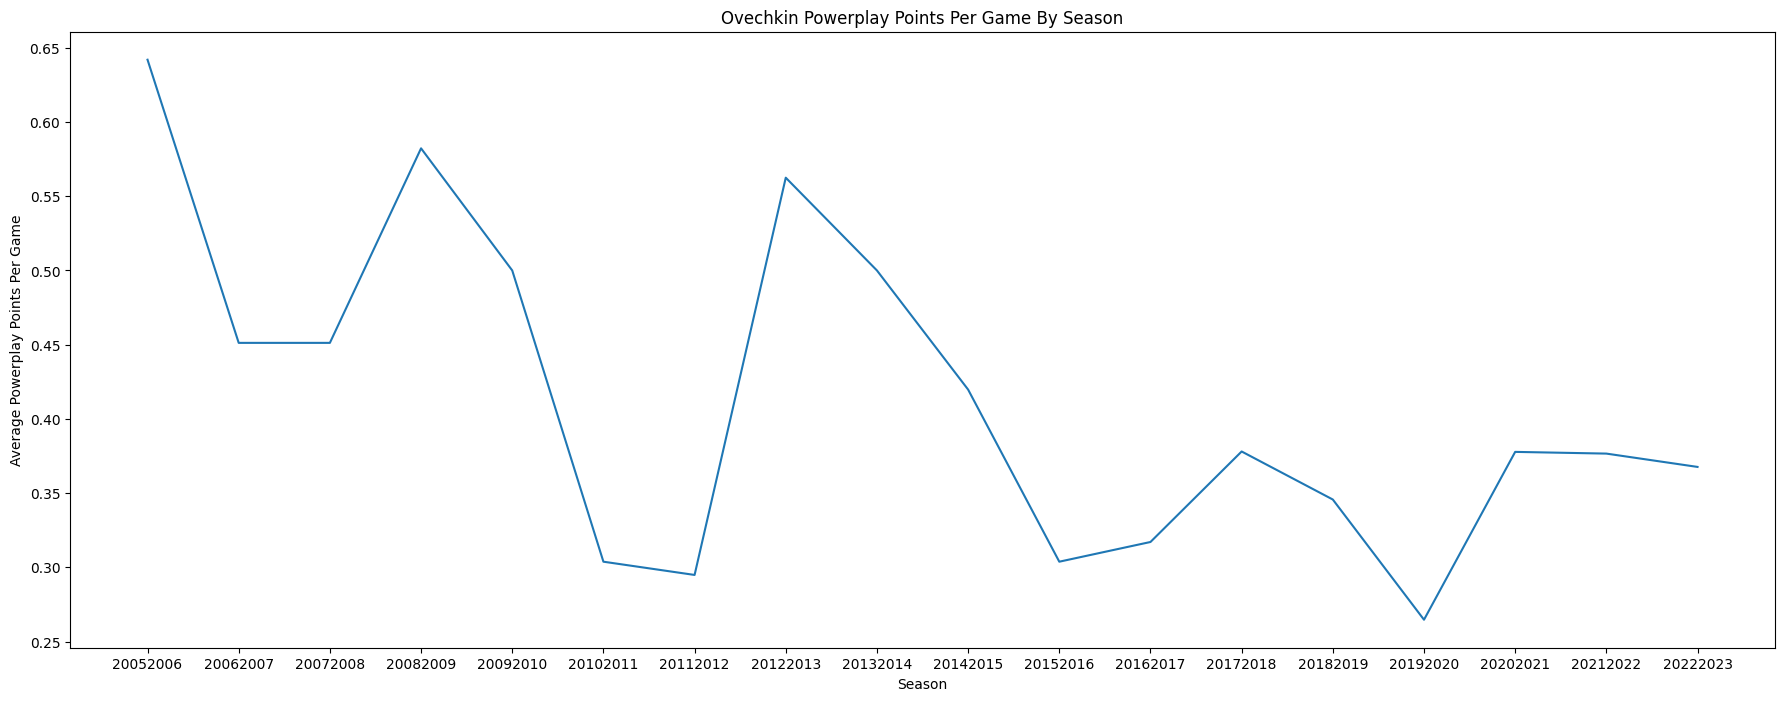

In [8]:
total_ppp = (df['Home PPP'] + df['Away PPP'])
avg_ppp = total_ppp/(df['Home Games'] + df['Away Games'])
 
plt.figure(figsize=(22,8))
plt.title('Ovechkin Powerplay Points Per Game By Season')

plt.plot(df['Season'], avg_ppp)
plt.xticks(df['Season'])
plt.xlabel('Season')
plt.ylabel('Average Powerplay Points Per Game')
plt.ticklabel_format(useOffset=False, style='plain')
    
plt.show()

Shooting Percentage Per Year

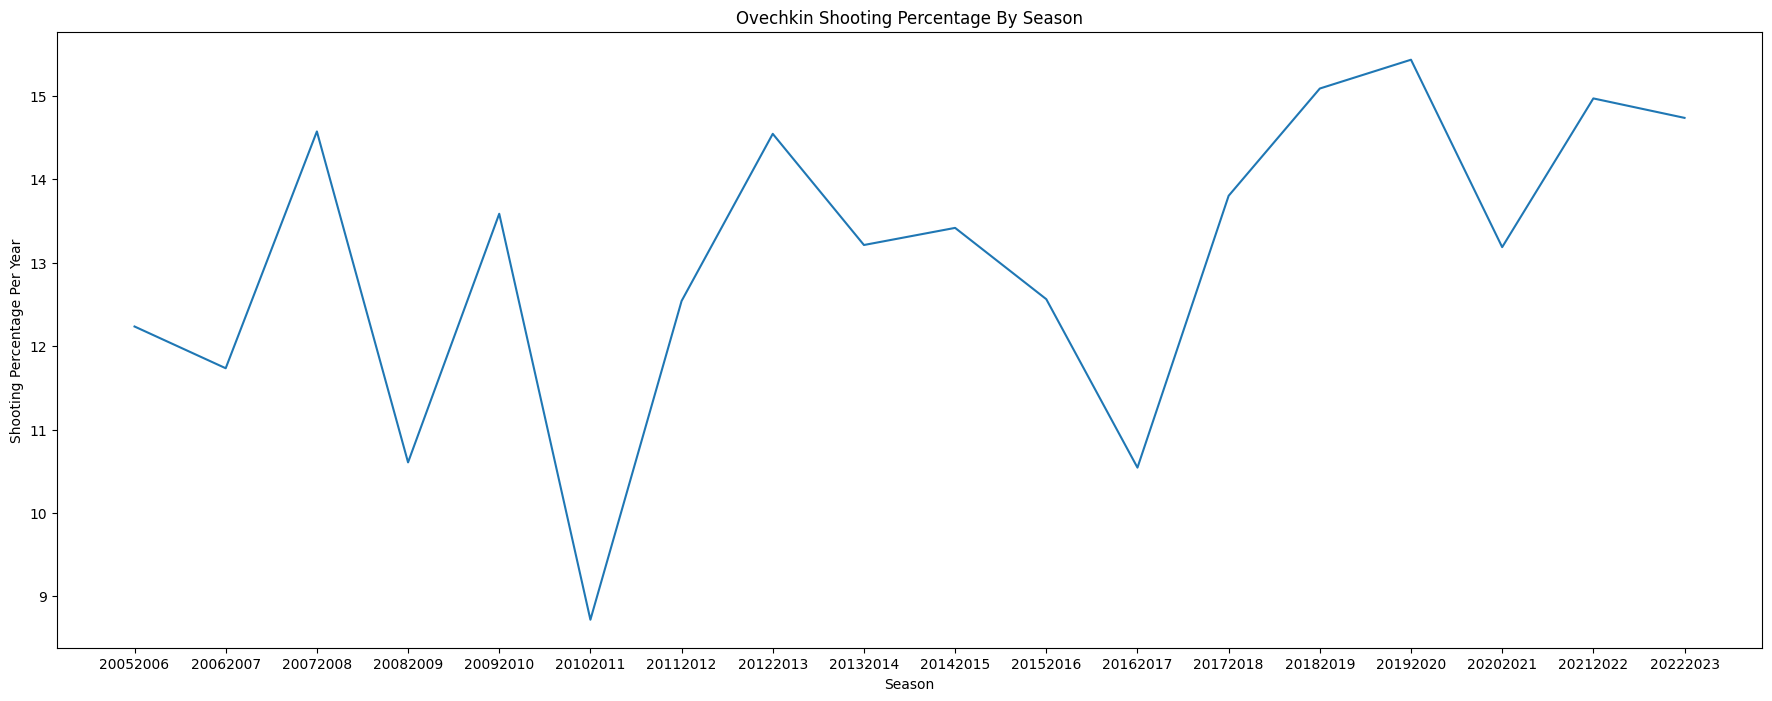

In [9]:
total_shots = (df['Home Shots'] + df['Away Shots'])
shooting_pct = (totalGoals/total_shots *100)
 
plt.figure(figsize=(22,8))
plt.title('Ovechkin Shooting Percentage By Season')

plt.plot(df['Season'], shooting_pct)
plt.xticks(df['Season'])
plt.xlabel('Season')
plt.ylabel('Shooting Percentage Per Year')
plt.ticklabel_format(useOffset=False, style='plain')
    
plt.show()

Based on the analysis above, we can see most of the factors have remained consistent but there is a slight decline in his Hits, PIMs, and Powerplay points over the last couple of years. Along with that, we see that his shifts per game has been consistent over the past 10 years and his shooting percentage has been mainly at its peak the past 5 years. 

This tells us that Ovi is no longer the active player that he used to be as he is not getting as involved in all areas of the game that he used to. However, his coaches' trust in him is evident by the number of shifts he is still taking per game. This along with a higher shooting percentage indicates that he is still a generational player but he is more of a one-dimensional scorer at this stage of his career. 

Let's put some of these factors into a regression and see if we can predict when he will break this goal record.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

X = np.array([totalGames, total_hits, total_pims, total_shifts, shooting_pct])
X = X.transpose()
y = totalGoals

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

regr = LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 -57.805239730109584
Coefficients: 
 [0.12258502 0.0352548  0.19937733 0.01740161 3.881936  ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     8.534
Date:                Tue, 25 Apr 2023   Prob (F-statistic):            0.00120
Time:                        16:08:33   Log-Likelihood:                -53.239
No. Observations:                  18   AIC:                             118.5
Df Residuals:                      12   BIC:                             123.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


We will now analyze the results from the regression above. 

We can see that our R Squared value is 0.780 and this explains that our model is roughly 80% accurate.

Looking at the p values, we see that penalty minutes and shooting percentage is statistically significant with a p value < 0.05.

Finally, we will look at the coefficients of the explanatory variables. The coefficient tells us that if an independent variable takes on a value of 1, the model will increase by the coefficient. We also see that all of the coefficients are positive meaning they will positively impact our model. The shooting percentage variable has the highest coefficient and the highest impact on our model. 



Now let's determine the number of games it will take for Ovi to break the goal record.

Here is our regression equation: y = -57.805239730109584 + 0.12258502 * x1 + 0.0352548 * x2 + 0.19937733 * x3 + 0.01740161 * x4 + 3.881936 * x5.

We will isolate x1 (total games) on the left and set y equal to how many goals he needs left to break the record. 

Here is our revised equation which we will define below:
 
x1 = (-57.805239730109584 + 0.0352548 * x2 + 0.19937733 * x3 + 0.01740161 * x4 + 3.881936 * x5 - goals left)/-0.12258502

We will compare this model by assuming the other independent variables are his averages over the last 5 years, the last 10 years and throughout his career. 

In [11]:
goals_left = 895 - totalGoals.sum()

def f(x2, x3, x4, x5):
    x1 = (-57.805239730109584 + 0.0352548 * x2 + 0.19937733 * x3 + 0.01740161 * x4 + 3.881936 * x5 - goals_left)/-0.12258502
    return x1

# Last 5 Year Averages
#[totalGames, total_hits, total_pims, total_shifts, shooting_pct]

last_five = df[df['Season'] >= 20182019]
avg_hits_five = (last_five['Home Hits'] + last_five['Away Hits']).mean()
avg_pims_five = (last_five['Home PIM'] + last_five['Away PIM']).mean() 
avg_shifts_five = (last_five['Home Shifts'] + last_five['Away Shifts']).mean()
avg_sp_five = ((last_five['Home Goals'] + last_five['Away Goals'])/(last_five['Home Shots'] + last_five['Away Shots'])*100).mean()

print(f(avg_hits_five, avg_pims_five, avg_shifts_five, avg_sp_five))

# Last 10 Year Averages
last_ten = df[df['Season'] >= 20132014]
avg_hits_ten = (last_ten['Home Hits'] + last_ten['Away Hits']).mean()
avg_pims_ten = (last_ten['Home PIM'] + last_ten['Away PIM']).mean()
avg_shifts_ten = (last_ten['Home Shifts'] + last_ten['Away Shifts']).mean()
avg_sp_ten = ((last_ten['Home Goals'] + last_ten['Away Goals'])/(last_ten['Home Shots'] + last_ten['Away Shots'])*100).mean()

print(f(avg_hits_ten, avg_pims_ten, avg_shifts_ten, avg_sp_ten))

# Entire Career Averages
avg_hits_career = (df['Home Hits'] + df['Away Hits']).mean()
avg_pims_career = (df['Home PIM'] + df['Away PIM']).mean()
avg_shifts_career = (df['Home Shifts'] + df['Away Shifts']).mean()
avg_sp_career = ((df['Home Goals'] + df['Away Goals'])/(df['Home Shots'] + df['Away Shots'])*100).mean()

print(f(avg_hits_career, avg_pims_career, avg_shifts_career, avg_sp_career))

306.9912080905186
293.16168036709854
297.53010847421035


Based on our results and accounting for his decline, our model along with his averages over his career, last 5 years and last 10 years predict that he will score the golden goal in roughly 4 seasons.

Here are some of the following limitations to our analysis:

- Our model does not take into account the quality of his linemates and teammates.
- Ovi has been a relatively healthy player throughout his career, however, he is more prone to injuries now that his body is aging. 
- We have done our best to incorporate his decline but Ovi has not had a major drop off in his career. He could be due for a major decline as he is approaching 40 years old and at the end of his career. 